In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [2]:
TRAIN_IMAGES_PATH = './data/images/train'
TEST_IMAGES_PATH = './data/images/test'
VAL_IMAGES_PATH = './data/images/val'

TRAIN_NPZ_FILE = './data/npz/train_images.npz'
TEST_NPZ_FILE = './data/npz/test_images.npz'
VAL_NPZ_FILE = './data/npz/val_images.npz'

NUM_FEATURES = 224 * 224 * 3

In [3]:
def preprocess_images_to_numpy_arrays(input_dir, output_file, img_size=224, grayscale=False):
    images, labels = [], []
    directories = [d for d in os.listdir(input_dir) if d!='.DS_Store']
    class_names = sorted(directories)
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in tqdm(class_names, desc='Processing classes'):
        class_dir = os.path.join(input_dir, class_name)
        image_names = [img for img in os.listdir(class_dir) if img.endswith(('jpg', 'jpeg'))]
        print(f'Processing {class_dir} directory')
        
        for img_name in image_names:
            if type(img_name)== str:
                img_path = os.path.join(class_dir, img_name)
                img = Image.open(img_path)
                if grayscale:
                    img = img.convert("L")
                else:
                    img = img.convert("RGB")
                img = img.resize((img_size, img_size), Image.Resampling.LANCZOS)
                img_array = np.array(img, dtype=np.float32)/255.0

                images.append(img_array)
                labels.append(class_to_idx[class_name])
                
    images = np.stack(images)
    labels = np.array(labels)

    np.savez_compressed(output_file, images=images, labels=labels, classes=class_names)
    print(f"Saved preprocessed data to {output_file}")

In [4]:
preprocess_images_to_numpy_arrays(input_dir=TRAIN_IMAGES_PATH, output_file=TRAIN_NPZ_FILE)

Processing classes:   0%|                                 | 0/6 [00:00<?, ?it/s]

Processing ./data/images/train/Chickenpox directory


Processing classes:  17%|████▏                    | 1/6 [00:00<00:02,  2.05it/s]

Processing ./data/images/train/Cowpox directory


Processing classes:  33%|████████▎                | 2/6 [00:01<00:03,  1.08it/s]

Processing ./data/images/train/HFMD directory


Processing classes:  50%|████████████▌            | 3/6 [00:05<00:06,  2.16s/it]

Processing ./data/images/train/Healthy directory


Processing classes:  67%|████████████████▋        | 4/6 [00:06<00:03,  1.68s/it]

Processing ./data/images/train/Measles directory


Processing classes:  83%|████████████████████▊    | 5/6 [00:06<00:01,  1.32s/it]

Processing ./data/images/train/Monkeypox directory


Processing classes: 100%|█████████████████████████| 6/6 [00:07<00:00,  1.29s/it]


Saved preprocessed data to ./data/npz/train_images.npz


In [5]:
preprocess_images_to_numpy_arrays(input_dir=TEST_IMAGES_PATH, output_file=TEST_NPZ_FILE)

Processing classes:   0%|                                 | 0/6 [00:00<?, ?it/s]

Processing ./data/images/test/Chickenpox directory
Processing ./data/images/test/Cowpox directory


Processing classes:  33%|████████▎                | 2/6 [00:00<00:00,  8.14it/s]

Processing ./data/images/test/HFMD directory


Processing classes:  83%|████████████████████▊    | 5/6 [00:00<00:00,  5.58it/s]

Processing ./data/images/test/Healthy directory
Processing ./data/images/test/Measles directory
Processing ./data/images/test/Monkeypox directory


Processing classes: 100%|█████████████████████████| 6/6 [00:01<00:00,  5.97it/s]


Saved preprocessed data to ./data/npz/test_images.npz


In [6]:
preprocess_images_to_numpy_arrays(input_dir=VAL_IMAGES_PATH, output_file=VAL_NPZ_FILE)

Processing classes:   0%|                                 | 0/6 [00:00<?, ?it/s]

Processing ./data/images/val/Chickenpox directory
Processing ./data/images/val/Cowpox directory


Processing classes:  33%|████████▎                | 2/6 [00:00<00:00, 10.29it/s]

Processing ./data/images/val/HFMD directory


Processing classes: 100%|█████████████████████████| 6/6 [00:00<00:00,  8.12it/s]

Processing ./data/images/val/Healthy directory
Processing ./data/images/val/Measles directory
Processing ./data/images/val/Monkeypox directory


Saved preprocessed data to ./data/npz/val_images.npz


In [7]:
def load_and_visualize_npy(file_path, dataset, idx=0):
    data = np.load(file_path, allow_pickle=True)
    images, labels, class_names = data['images'], data['labels'], data['classes']

    image = images[idx]
    label = labels[idx]
    class_name = class_names[label]

    plt.imshow(image)
    plt.title(f"Class: {class_name} in {dataset}")
    plt.axis("off")
    plt.show()

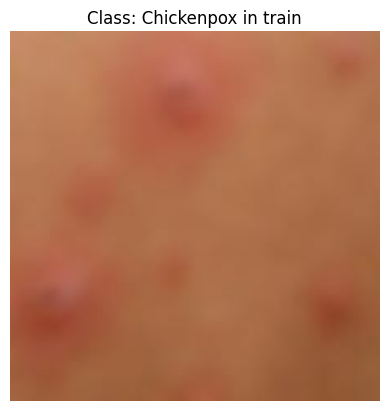

In [8]:
load_and_visualize_npy(TRAIN_NPZ_FILE, 'train', idx=10)

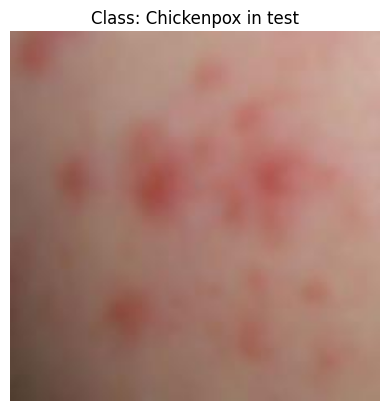

In [9]:
load_and_visualize_npy(TEST_NPZ_FILE, 'test', idx=5)

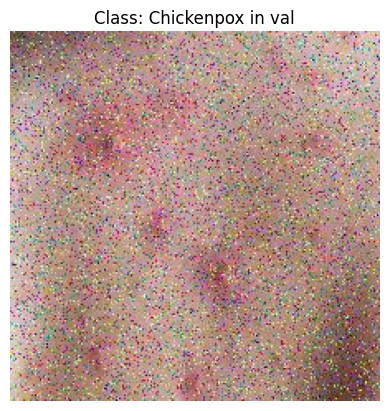

In [10]:
load_and_visualize_npy(VAL_NPZ_FILE, 'val', idx=5)